In [1]:
import networkx as nx
#print(nx.__version__)
import csv
import community
import pandas as pd
from itertools import combinations
#create an empty graph
G = nx.Graph()

In [2]:
# Open the CSV file and read the data for languages
with open('dataset/languages.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # Add the language node to graph with green color
        G.add_node(row[0], language=row[1], color='#30FBD0')

In [3]:
#create nodes and edges bewtween repositories and languages
with open('dataset/repos.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # transform the string of languages into an array of strings
        row[2], row[5], row[6] = tuple(x.replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').replace('"', '').split(',') for x in (row[2], row[5], row [6]))
        
        G.add_node(row[0], name=row[1], topics=row[2], n_star=row[3], n_fork=row[4], languages=row[5], p_lang=row[6], color='#5D7EF5')
        # Add the edges between the repository and the languages
        #for lang in row[5]:
         #   G.add_edge(row[0], lang)

In [4]:
# create nodes and edges between users and repositories
with open('dataset/users.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # transform the string of repositories into an array of strings
        row[2:4] = [x.replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').replace('"', '').split(',') for x in row[2:4]]
        # Add the user node to graph with blue color
        G.add_node(row[0], name=row[1], repos=row[2], commits= row[3], color='#F8A643')
        # Add edges between the user and their repositories
        #for repo in row[2]:
         #   G.add_edge(row[0], repo)

In [5]:
# Add edges between users and repositories based on the users' list of repositories
for node in list(G.nodes):
    # if it's a user node
    if len(node) >= 1:
        if node[0] == "u":
            # for each repository in the user's list of repositories
            for repo in G.nodes[node]['repos']:
                # add an edge between the user and the repository
                G.add_edge(node, repo)
        if node[0] == "r":
            # for each language in the repository's list of languages
            for lang in G.nodes[node]['languages']:
                # add an edge between the repository and the language
                G.add_edge(node, lang)     

nx.info(G)

/var/folders/dn/3rzmgvf53gv2ssvdr1f517gc0000gn/T/ipykernel_7675/418544197.py:16: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 1499 nodes and 2369 edges'

In [6]:
#draw graph with space between nodes
#nx.draw(G, with_labels=False, node_size=1, node_color="#7FB2FD", edge_color="#e795d1", font_size=8, font_color="#000000")
#plt.show()

In [7]:
# Set the layout of the graph
#pos = nx.kamada_kawai_layout(G)

# Draw the nodes and edges of the graph
#nx.draw(G, pos, node_size=200, node_color="#7FB2FD", edge_color="#FF8CCD", with_labels=True, font_size=8)

# Draw the labels of the repositories at an angle to reduce overlap
#repo_labels = nx.get_node_attributes(G, "name")
#repo_pos = {k: (v[0], v[1]-0.1) for k, v in pos.items() if k in repo_labels}
#nx.draw_networkx_labels(G, repo_pos, labels=repo_labels, font_size=8, font_color="k", alpha=1)

# Draw the labels of the users on top of the nodes
#user_labels = nx.get_node_attributes(G, "name")
#nx.draw_networkx_labels(G, pos, labels=user_labels, font_size=8, font_color="k", alpha=1)

# Show the graph
#plt.show()

In [8]:
# Calculate the degree centrality of all nodes
degree_centrality = nx.degree_centrality(G)

# Split the degree centrality for users and repositories
languages_degree_centrality = { k: v for k, v in degree_centrality.items() if k.startswith('l_')}
users_degree_centrality = { k: v for k, v in degree_centrality.items() if k.startswith('u_')}

# Print the degree centrality of first 10 users in descending order
print("\nDegree centrality of first 5 languages in descending order:")
for node in sorted(languages_degree_centrality, key=languages_degree_centrality.get, reverse=True)[:5]:
    print(node, G.nodes[node]['language'], languages_degree_centrality[node])
    
# Print mean degree centrality for users
print("\nMean degree centrality for languages:", sum(languages_degree_centrality.values())/len(languages_degree_centrality))


Degree centrality of first 5 languages in descending order:
l_0 Ruby 0.48664886515353806
l_1 JavaScript 0.2096128170894526
l_4 Shell 0.0801068090787717
l_8 Python 0.06475300400534045
l_6 C 0.058077436582109475

Mean degree centrality for languages: 0.013930662128258938


{'l_0': Text(-0.1385671550769633, 0.0959029592106065, 'l_0'),
 'l_1': Text(0.03774013728846612, -0.4723830532402187, 'l_1'),
 'l_4': Text(0.5977203312945248, -0.07788400190253797, 'l_4'),
 'l_8': Text(0.5794331841335385, -0.38791029618131956, 'l_8'),
 'l_6': Text(0.629716671031268, 0.17276605488443375, 'l_6')}

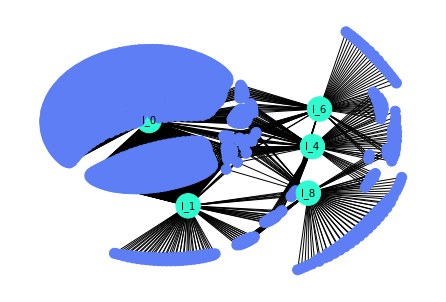

In [9]:
# Draw the graph containing only the top 5 languages with neighbours based on degree centrality
languages_subgraph = nx.Graph()
for node in sorted(languages_degree_centrality, key=languages_degree_centrality.get, reverse=True)[:5]:
    languages_subgraph.add_node(node, color = G.nodes[node]['color'])
    for neighbour in G.neighbors(node):
        if neighbour[0] == "l":
            languages_subgraph.add_node(neighbour, color = G.nodes[neighbour]['color'])
        else:
            languages_subgraph.add_node(neighbour, color = G.nodes[neighbour]['color'])
        languages_subgraph.add_edge(node, neighbour)

pos = nx.kamada_kawai_layout(languages_subgraph)
node_sizes = [600 if node.startswith('l_') else 100 for node in languages_subgraph.nodes]
nx.draw(languages_subgraph, pos, node_size=node_sizes, node_color=[languages_subgraph.nodes[node]['color'] for node in languages_subgraph.nodes])
labels = {node: node for node in languages_subgraph.nodes if node.startswith('l_')}
nx.draw_networkx_labels(languages_subgraph, pos, labels, font_size=10)

Degree centrality to users 

Calcolato per poi usarlo per disegnare il grafo della modularity per selezionare gli utenti con più repository

In [10]:
print("\nDegree centrality of first 10 users in descending order:")
for node in sorted(users_degree_centrality, key=users_degree_centrality.get, reverse=True)[:10]:
    print(node, users_degree_centrality[node])

# Print mean degree centrality for users
print("\nMean degree centrality for users:", sum(users_degree_centrality.values())/len(users_degree_centrality))


Degree centrality of first 10 users in descending order:
u_64 0.006008010680907877
u_3 0.004005340453938584
u_191 0.004005340453938584
u_70 0.0033377837116154874
u_125 0.0033377837116154874
u_156 0.0033377837116154874
u_238 0.0033377837116154874
u_72 0.0026702269692923898
u_97 0.0026702269692923898
u_99 0.0026702269692923898

Mean degree centrality for users: 0.0009286674976229085


{'u_64': Text(0.4173549983461549, 0.20100011090584688, 'u_64'),
 'u_3': Text(0.12818977160334766, 0.4555563512256938, 'u_3'),
 'u_191': Text(-0.19462711006668806, 0.4313758816589854, 'u_191'),
 'u_70': Text(-0.41790621930205274, 0.22756211791271924, 'u_70'),
 'u_125': Text(-0.4734805934546485, -0.04739418492493523, 'u_125'),
 'u_156': Text(-0.36451071644751754, -0.3058800481957446, 'u_156'),
 'u_238': Text(-0.12886489389197703, -0.4580660116480394, 'u_238'),
 'u_72': Text(0.12951001749051522, -0.46012525063930376, 'u_72'),
 'u_97': Text(0.33379469233703546, -0.3421533192796294, 'u_97'),
 'u_99': Text(0.4567832987002057, -0.14084854968620547, 'u_99')}

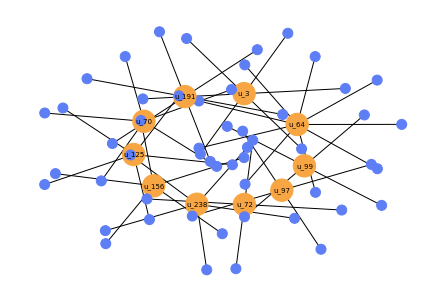

In [11]:
# Draw the graph containing only the top 10 users with neighbours based on degree centrality
users_subgraph = nx.Graph()
for node in sorted(users_degree_centrality, key=users_degree_centrality.get, reverse=True)[:10]:
    users_subgraph.add_node(node, color=G.nodes[node]['color'])
    for neighbour in G.neighbors(node):
        if neighbour[0] == "u":
            users_subgraph.add_node(neighbour, color=G.nodes[neighbour]['color'])
        else:
            users_subgraph.add_node(neighbour, color=G.nodes[neighbour]['color'])
        users_subgraph.add_edge(node, neighbour)

pos = nx.kamada_kawai_layout(users_subgraph)
node_sizes = [500 if node.startswith('u_') else 100 for node in users_subgraph.nodes]
nx.draw(users_subgraph, pos, node_size=node_sizes, node_color=[users_subgraph.nodes[node]['color'] for node in users_subgraph.nodes])
labels = {node: node for node in users_subgraph.nodes if node.startswith('u_')}
nx.draw_networkx_labels(users_subgraph, pos, labels, font_size=7)

Modularity

calcolata per comprendere se gli utenti di GitHub tendono a specializzarsi in un linguaggio o a variare.
In questo caso abbiamo una modularity pari a 0,55 che indica una forte struttura di comunità nel grafo, che potrebbe essere indicativa di una specializzazione degli utenti in termini di linguaggi di programmazione utilizzati nelle diverse repository.

In particolare, una modularità maggiore di 0,3-0,4 indica una buona struttura di comunità nel grafo, mentre valori maggiori di 0,5 indicano una forte struttura di comunità. Tuttavia, va notato che la modularità da sola potrebbe non essere sufficiente per stabilire se gli utenti tendono a specializzarsi o meno, ma potrebbe essere necessario un'analisi più dettagliata dei dati.

In [12]:
#calculate modularity to find user comunites based on languages used in different repositories
partition = community.best_partition(G)
modularity = community.modularity(partition, G)

# Print the modularity of the graph
print("\nModularity of the graph:", modularity)


Modularity of the graph: 0.556610100814998


{'u_105': Text(0.5801908452690246, 0.232303554701818, 'u_105'),
 'u_110': Text(0.47895424146065163, 0.3809305381976539, 'u_110'),
 'u_27': Text(0.30621277298468247, 0.465735588516096, 'u_27'),
 'u_74': Text(0.20378159830177703, 0.5537391075524629, 'u_74'),
 'u_75': Text(0.06237755083074834, 0.5715851285656206, 'u_75'),
 'u_109': Text(-0.08079584484853734, 0.5315512657374508, 'u_109'),
 'u_214': Text(-0.09998743131221591, 0.36998864009534627, 'u_214'),
 'u_95': Text(-0.33841700706553846, 0.2822149359377945, 'u_95'),
 'u_147': Text(-0.39633253789926903, 0.13813910626756692, 'u_147'),
 'u_19': Text(-0.30647637049226334, -0.33107669870130135, 'u_19'),
 'u_89': Text(-0.1748898260275723, -0.46288065265193956, 'u_89'),
 'u_141': Text(-0.9287464570636692, 0.17862153611896653, 'u_141'),
 'u_234': Text(-1.0, -0.05196927868632378, 'u_234'),
 'u_267': Text(-0.9002688750408413, -0.27515779711273547, 'u_267'),
 'u_30': Text(-0.03650902870235721, -0.5469894912027893, 'u_30'),
 'u_57': Text(0.13828513

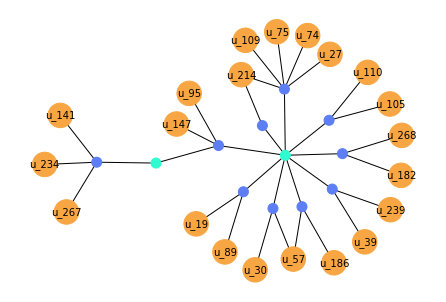

In [13]:
# Draw the graph containing only the top 5 users with neighbours based on modularity and degree centrality of users
users_subgraph = nx.Graph()
for node in sorted(partition, key=partition.get, reverse=True)[:30]:
    users_subgraph.add_node(node, color = G.nodes[node]['color'])
    for neighbour in G.neighbors(node):
        if neighbour[0] == "u":
            users_subgraph.add_node(neighbour, color = G.nodes[neighbour]['color'])
        else:
            users_subgraph.add_node(neighbour, color = G.nodes[neighbour]['color'])
        users_subgraph.add_edge(node, neighbour)

pos = nx.kamada_kawai_layout(users_subgraph)
node_sizes = [600 if node.startswith('u_') else 100 for node in users_subgraph.nodes]
nx.draw(users_subgraph, pos, node_size=node_sizes, node_color=[users_subgraph.nodes[node]['color'] for node in users_subgraph.nodes])
labels = {node: node for node in users_subgraph.nodes if node.startswith('u_')}
nx.draw_networkx_labels(users_subgraph, pos, labels, font_size=10)


In [14]:
#print(users_subgraph.nodes.data())

Structural equivalence

Calcola per comprendere quali linguaggi di programmazione vengono spesso utilizzati insieme.

In questo caso siamo andati prima a vedere in ogni repository le combinazioni di linguaggi che vengono utilizzati insieme (prende in cosiderazioni solo liste di lunghezza uguale).
Quindi, se due repository hanno le stesse combinazioni di linguaggio allora sono considerate strutturalmente equivalenti.
Nel grafo sono rappresentati le 5 combinazioni di linguaggi più utilizzati.



Number of structural equivalence classes: {frozenset({'r_1031'}), frozenset({'r_150'}), frozenset({'r_540'}), frozenset({'r_44'}), frozenset({'r_148', 'r_553'}), frozenset({'r_171'}), frozenset({'r_640'}), frozenset({'r_1064'}), frozenset({'r_571', 'r_402', 'r_317'}), frozenset({'r_583'}), frozenset({'r_846'}), frozenset({'r_289'}), frozenset({'r_371'}), frozenset({'r_64'}), frozenset({'r_249', 'r_133', 'r_376', 'r_554', 'r_259', 'r_990', 'r_85', 'r_632'}), frozenset({'r_738'}), frozenset({'r_155'}), frozenset({'r_708'}), frozenset({'r_199'}), frozenset({'r_354'}), frozenset({'r_373', 'r_168', 'r_976'}), frozenset({'r_823', 'r_559', 'r_621'}), frozenset({'r_888', 'r_365'}), frozenset({'r_227'}), frozenset({'r_104', 'r_368'}), frozenset({'r_659'}), frozenset({'r_624', 'r_641'}), frozenset({'r_913'}), frozenset({'r_1025'}), frozenset({'r_177', 'r_547', 'r_1061', 'r_866', 'r_665', 'r_607'}), frozenset({'r_182', 'r_377', 'r_645', 'r_526', 'r_853', 'r_987', 'r_884', 'r_24', 'r_669', 'r_672

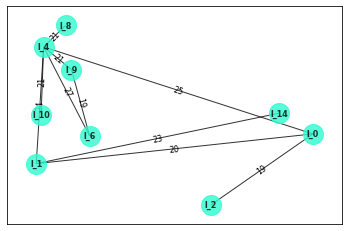

In [15]:
#calculare structural equivalence classes
def same_langs(repo1, repo2):
    langs1 = set(G.nodes[repo1]['languages'])
    langs2 = set(G.nodes[repo2]['languages'])
    return langs1 == langs2

repos = [r for r in G.nodes if r.startswith('r_')]
structural_equivalence = nx.equivalence_classes(repos, same_langs)

# Print the number of structural equivalence classes
print("\nNumber of structural equivalence classes:", structural_equivalence)

#lang_counts = {}
#for equiv_class in structural_equivalence:
 #   lang_set = set()
  #  for repo in equiv_class:
   #     lang_set.update(set(G.nodes[repo]['languages']))
    #for lang in lang_set:
     #   lang_counts[lang] = lang_counts.get(lang, 0) + 1

#top_langs = sorted(lang_counts.items(), key=lambda x: x[1], reverse=True)[:5]
#print(top_langs)

# Print the top 5 languages with the most structural equivalence classes
#print("\nTop 5 languages with the most structural equivalence classes:")
#for lang, count in top_langs:
    #print(lang, count)

# Ottieni le combinazioni di linguaggi utilizzati insieme
lang_combinations = {}
for equiv_class in structural_equivalence:
    lang_set = set()
    for repo in equiv_class:
        lang_set.update(set(G.nodes[repo]['languages']))
    for combo in combinations(lang_set, 2):
        lang_combinations[combo] = lang_combinations.get(combo, 0) + 1

# Stampa le 5 combinazioni di linguaggi più utilizzate
top_combinations = sorted(lang_combinations.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 5 language combinations:")
for combo, count in top_combinations:
    print(combo, count)

#creazione del grafo
G_langs = nx.Graph()
for combo, count in top_combinations:
    lang1, lang2 = combo
    G_langs.add_edge(lang1, lang2, weight=count)

# layout e visualizzazione del grafo
pos = nx.spring_layout(G_langs, k=0.90, iterations=1)

edge_weights = nx.get_edge_attributes(G_langs, 'weight')
nx.draw_networkx_edge_labels(G_langs, pos, edge_labels=edge_weights, font_size=8)
nx.draw_networkx(G_langs, pos, with_labels=True, node_size=400, node_color='#30FBD0', width=1, alpha=0.8, font_size=8, font_color='black', font_weight='bold')

Cores

Calcola i progetti più centrali che tendono ad avere un numero maggiore di star e di fork rispetto agli altri